In [15]:
!pip install tensorflow
!pip install yfinance
!pip install keras

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [17]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [18]:
stock = "GOOG"
stock_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [19]:
stock_data.head(20)

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-12-27,4.762721,4.797217,4.692984,4.694225,245079187
2004-12-28,4.783816,4.803422,4.740386,4.767684,166453579
2004-12-29,4.787291,4.802677,4.759495,4.759495,107525527
2004-12-30,4.903933,4.919568,4.761233,4.789028,237057231
2004-12-31,4.784561,4.960517,4.778852,4.944386,307889737
2005-01-03,5.030750,5.053830,4.850823,4.898968,636143518
2005-01-04,4.826998,5.036209,4.801684,4.998239,552298420
2005-01-05,4.802429,4.886560,4.770662,4.800940,330698912


In [20]:
stock_data.shape

(5036, 5)

In [21]:
stock_data.describe

<bound method NDFrame.describe of Price            Close        High         Low        Open     Volume
Ticker            GOOG        GOOG        GOOG        GOOG       GOOG
Date                                                                 
2004-12-27    4.762721    4.797217    4.692984    4.694225  245079187
2004-12-28    4.783816    4.803422    4.740386    4.767684  166453579
2004-12-29    4.787291    4.802677    4.759495    4.759495  107525527
2004-12-30    4.903933    4.919568    4.761233    4.789028  237057231
2004-12-31    4.784561    4.960517    4.778852    4.944386  307889737
...                ...         ...         ...         ...        ...
2024-12-20  192.960007  194.134995  186.369995  187.009995   45319700
2024-12-23  195.990005  196.490005  191.630005  194.029999   15235900
2024-12-24  197.570007  197.669998  195.197998  196.169998    6809800
2024-12-26  197.100006  198.160004  195.869995  196.740005    7918400
2024-12-27  194.039993  196.800003  191.972000  196.3999

In [22]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2004-12-27 to 2024-12-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5036 non-null   float64
 1   (High, GOOG)    5036 non-null   float64
 2   (Low, GOOG)     5036 non-null   float64
 3   (Open, GOOG)    5036 non-null   float64
 4   (Volume, GOOG)  5036 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.1 KB


In [23]:
stock_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

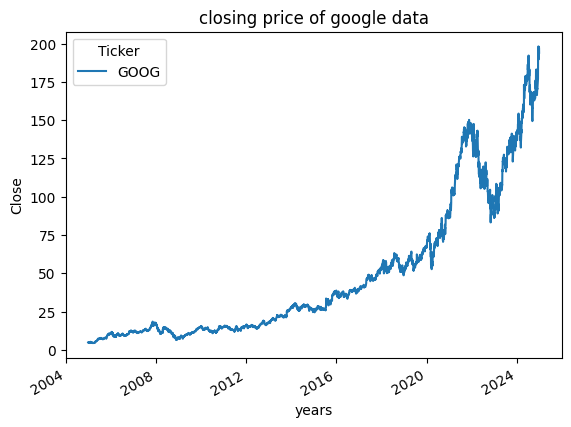

In [24]:
plt.figure(figsize=(10,10))
stock_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("closing price of google data")
plt.show()

In [25]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of stock data")
    plt.show()

In [26]:
stock_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

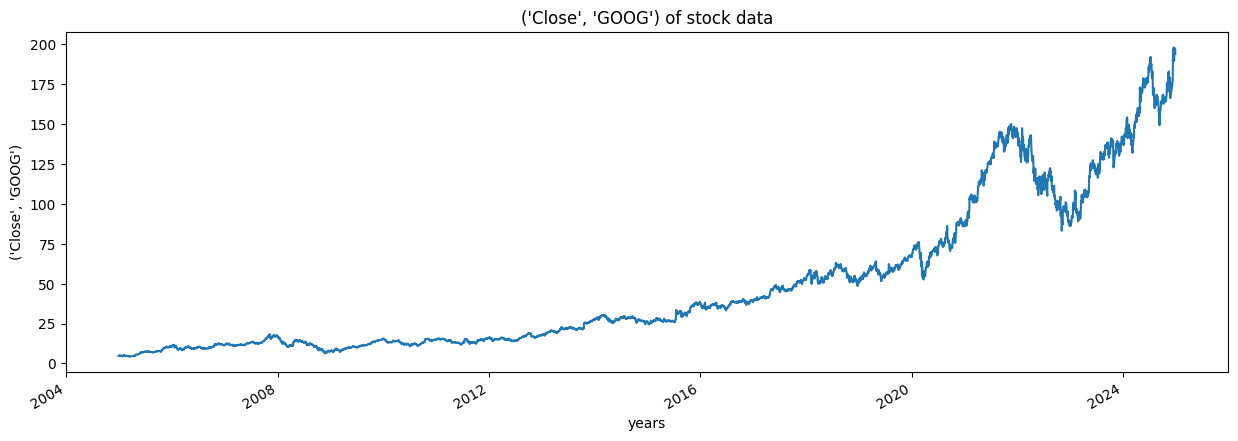

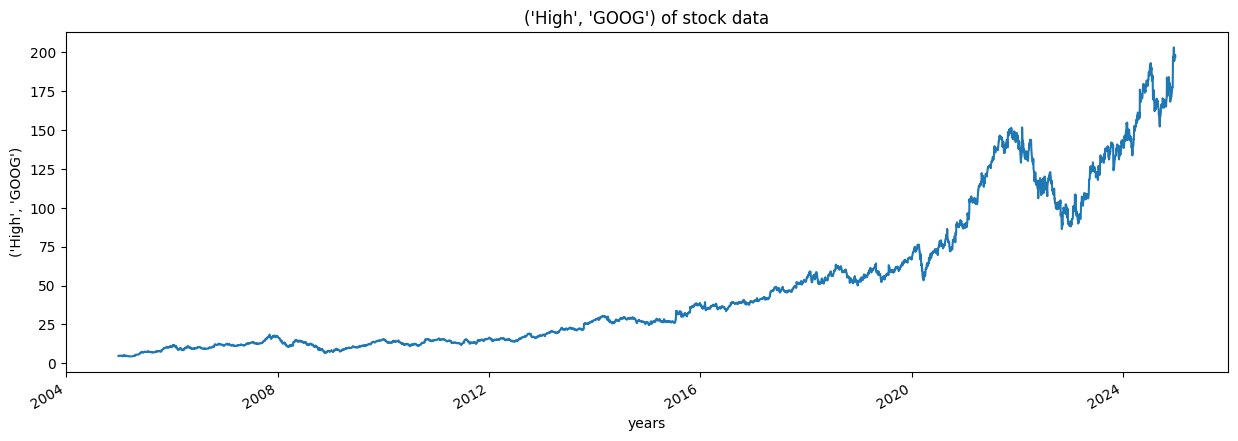

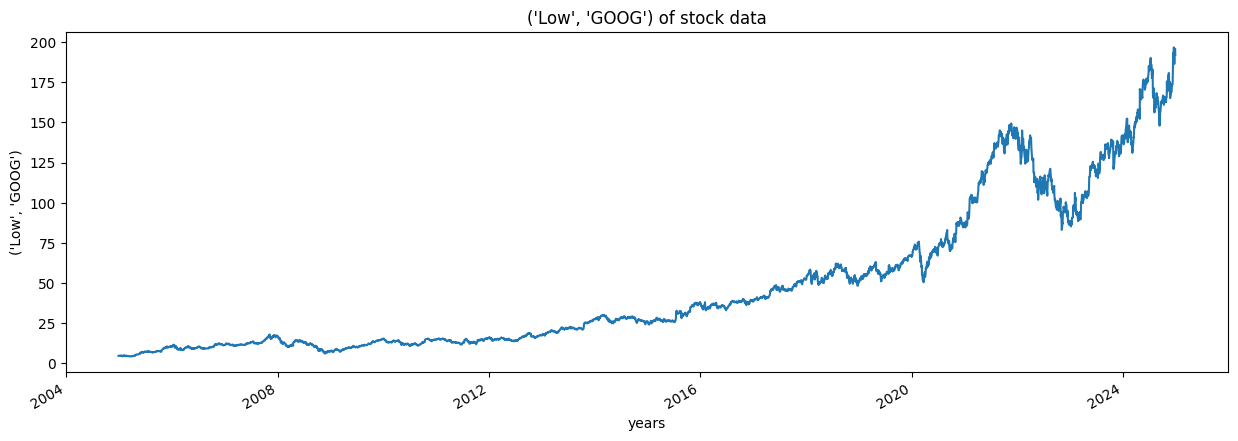

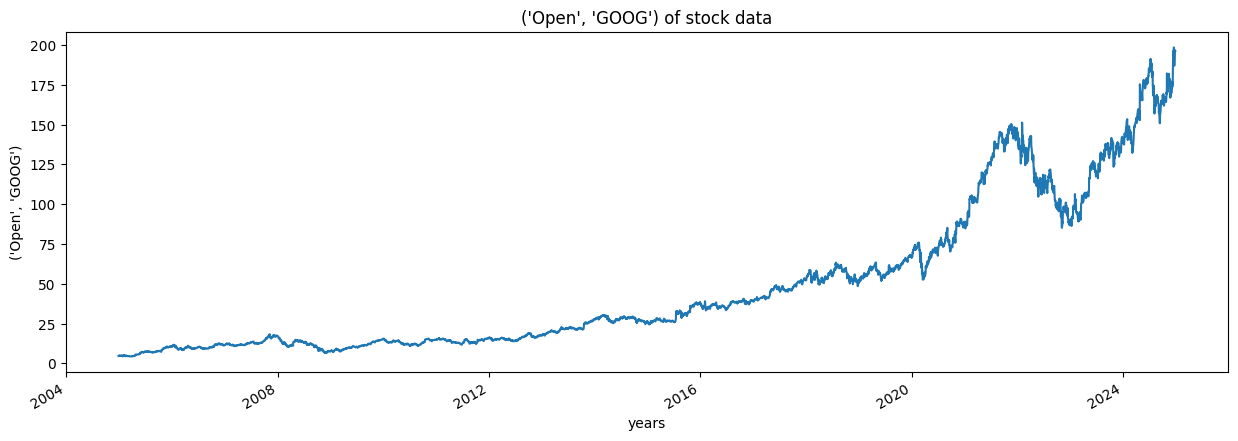

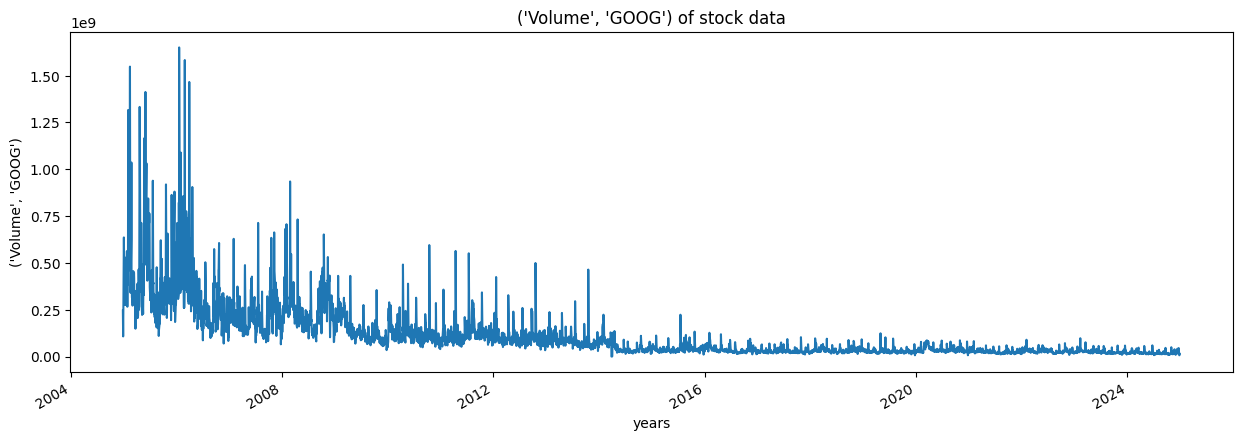

In [27]:
for column in stock_data.columns:
    plot_graph((15,5), stock_data[column],column)

Rolling mean

In [28]:
for i in range(2004,2025):
    print(i,list(stock_data.index.year).count(i)) #number of days in each year 250 days as stock data is updated on weekdays so excluding weekends

2004 5
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 250


In [29]:
stock_data['MA_for_250_days']=stock_data['Close'].rolling(250).mean()

In [30]:
stock_data['MA_for_250_days'][0:250].tail()

Date
2005-12-14         NaN
2005-12-15         NaN
2005-12-16         NaN
2005-12-19         NaN
2005-12-20    6.749122
Name: MA_for_250_days, dtype: float64

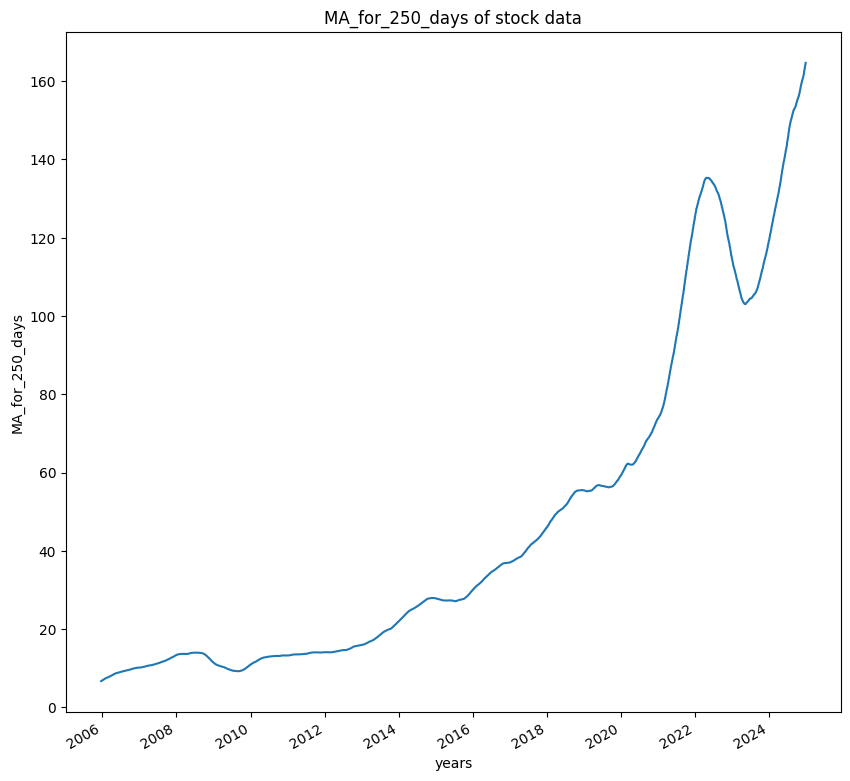

In [31]:
plot_graph((10,10),stock_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

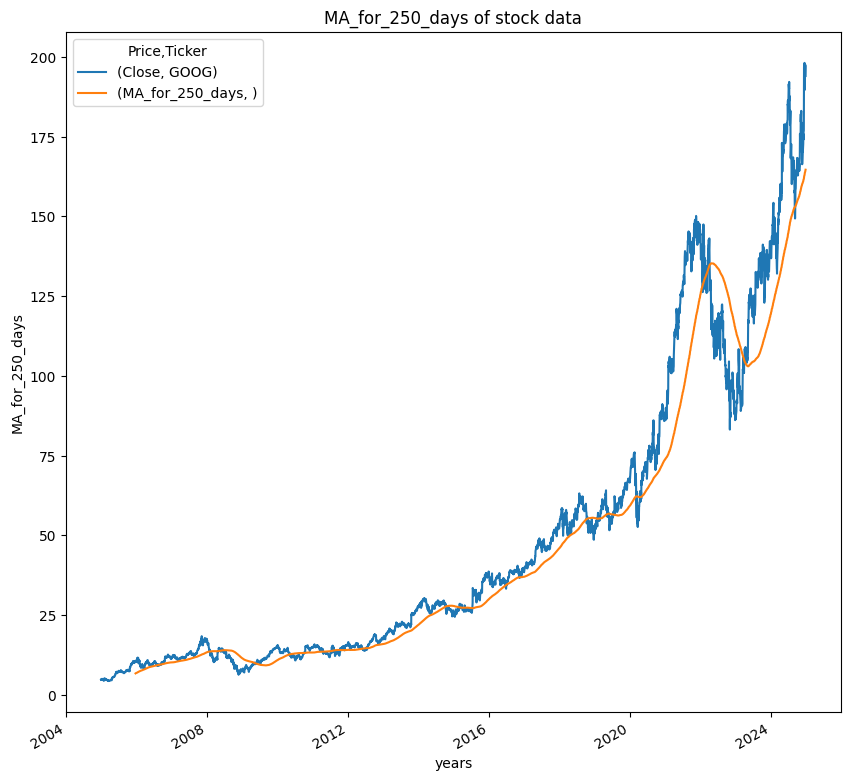

In [32]:
plot_graph((10,10),stock_data[['Close','MA_for_250_days']], 'MA_for_250_days')

here the yellow graph line that is the rolling (moving average) is starting late, from 250 because till 249 it is null

<Figure size 640x480 with 0 Axes>

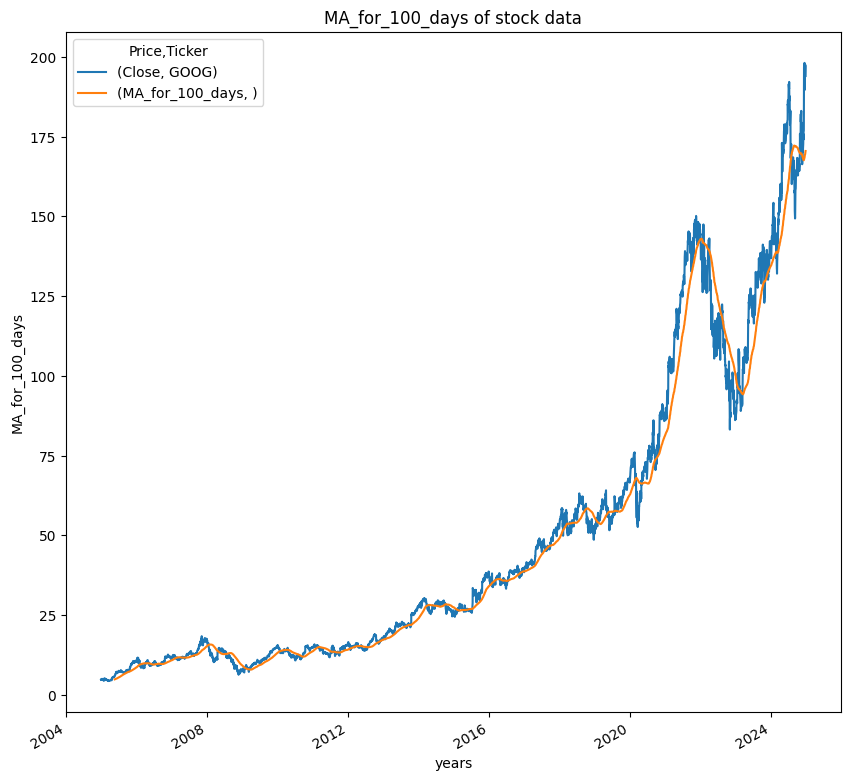

In [33]:
stock_data['MA_for_100_days']=stock_data['Close'].rolling(100).mean()
plot_graph((10,10),stock_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

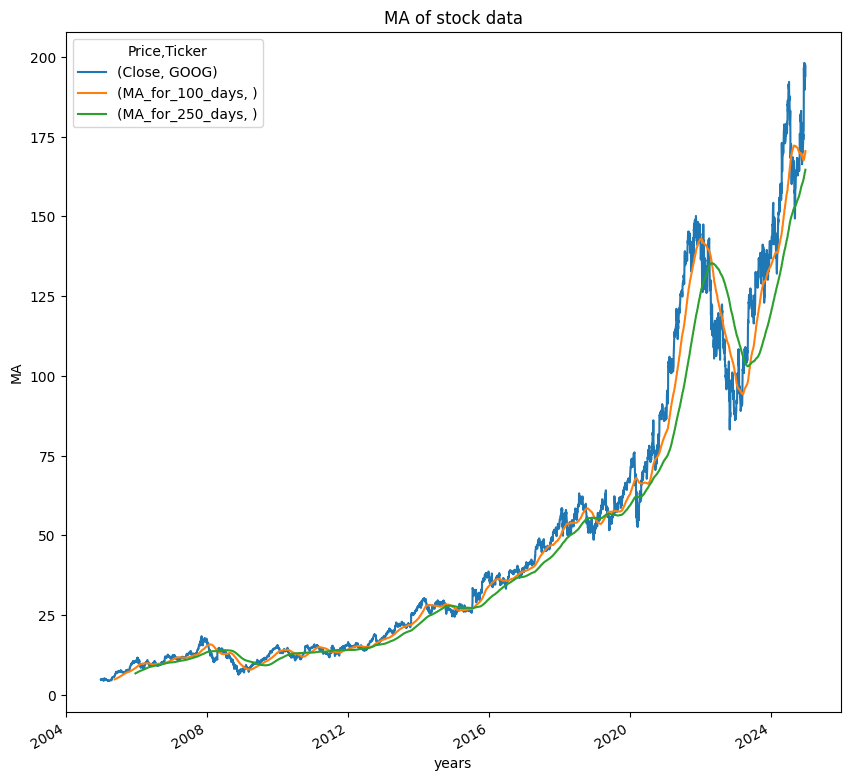

In [34]:
plot_graph((10,10),stock_data[['Close','MA_for_100_days','MA_for_250_days']], 'MA')

In [35]:
stock_data['percentage_change_cp'] = stock_data['Close'].pct_change()


In [36]:
stock_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-12-27,4.762721,NaN
2004-12-28,4.783816,0.004429
2004-12-29,4.787291,0.000726
2004-12-30,4.903933,0.024365
2004-12-31,4.784561,-0.024342


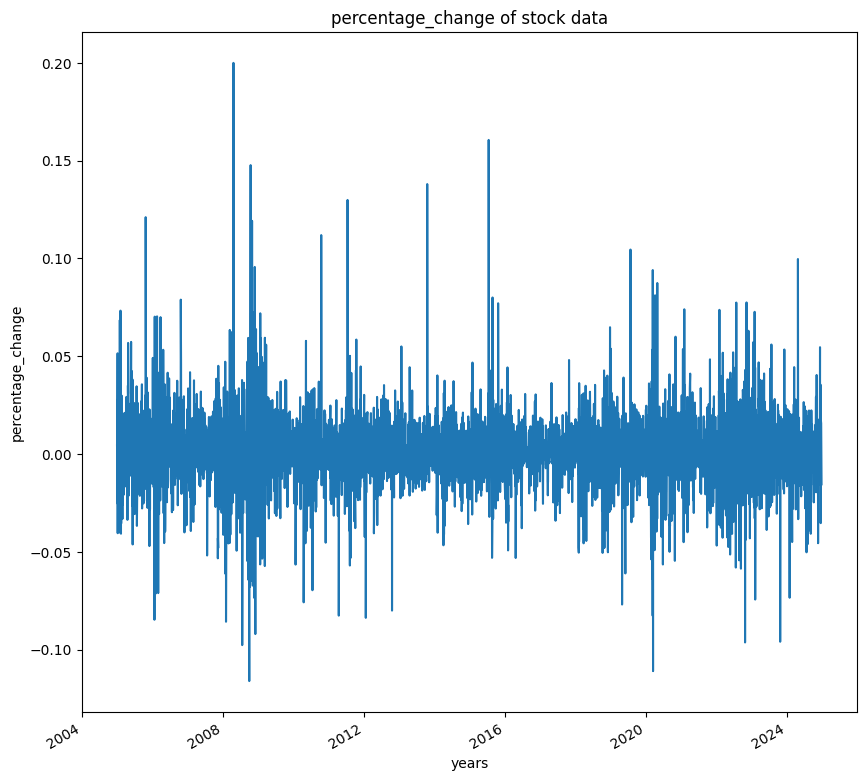

In [37]:
plot_graph((10,10),stock_data['percentage_change_cp'], 'percentage_change')

Normalizing the adj close price

In [38]:
Close_price = stock_data[['Close']]

In [39]:
max(Close_price.values),min(Close_price.values)

(array([198.16000366]), array([4.34280968]))

In [40]:
#normalize to 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)

In [42]:
scaled_data

array([[0.00216653],
       [0.00227537],
       [0.0022933 ],
       ...,
       [0.99695591],
       [0.99453094],
       [0.9787428 ]])

In [43]:
len(scaled_data)

5036

here we have taken range 0 to 1 but it seems like data is 6.427 e-04 ie. it is 0.00006427

here we will be using the moving average concept for prediction,
we will take 1 to 100 rows as input (training data) to predict 101 th row
similarly in next iteration, we will take 2 to 101 rows as input (training data) to predict 102 th row

In [44]:
x_data=[]
y_data=[]
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i]) #rolling window of size 100 that ends at index i
    y_data.append(scaled_data[i])
x_data, y_data = np.array(x_data),np.array(y_data)

In [45]:
print(x_data[0], y_data[0])

[[2.16653320e-03]
 [2.27537429e-03]
 [2.29329961e-03]
 [2.89511658e-03]
 [2.27921719e-03]
 [3.54942772e-03]
 [2.49817133e-03]
 [2.37140737e-03]
 [1.73630087e-03]
 [2.41494381e-03]
 [2.56987753e-03]
 [2.37524781e-03]
 [2.61085040e-03]
 [2.60444885e-03]
 [3.19858740e-03]
 [3.70180525e-03]
 [2.85670236e-03]
 [2.42390401e-03]
 [1.70172956e-03]
 [7.33703144e-04]
 [2.72737483e-04]
 [1.82465062e-03]
 [1.67612090e-03]
 [1.96550438e-03]
 [2.64158374e-03]
 [2.16525387e-03]
 [3.96557516e-03]
 [4.59300078e-03]
 [3.76070590e-03]
 [2.69408038e-03]
 [3.02827962e-03]
 [2.12427854e-03]
 [1.66331288e-03]
 [1.58904556e-03]
 [2.30482339e-03]
 [2.59164329e-03]
 [2.99883053e-03]
 [2.93352833e-03]
 [2.93992988e-03]
 [2.09738810e-03]
 [2.42774937e-03]
 [1.77983485e-03]
 [1.39313651e-03]
 [1.66459467e-03]
 [1.41746338e-03]
 [1.30478677e-03]
 [1.53910758e-03]
 [1.39697695e-03]
 [1.76959041e-03]
 [1.30734296e-03]
 [8.14369552e-04]
 [6.38949393e-04]
 [3.59807900e-04]
 [0.00000000e+00]
 [4.63526773e-04]
 [7.811021

we will  be predicting y_data[0] using all 100 values from x_data[0]

split data, 70% training, 30% testing

In [46]:
int(len(x_data)*0.7)

3455

In [47]:
len(scaled_data) - 100 - int(len(x_data)*0.7)

1481

In [48]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [49]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3455, 100, 1) (3455, 1) (1481, 100, 1) (1481, 1)


In [50]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/envs/idmpenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
model.fit(x_train,y_train, batch_size=1, epochs=2)

Epoch 1/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 270s 76ms/step - loss: 3.2849e-04
Epoch 2/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 244s 70ms/step - loss: 5.8611e-05


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [54]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step


In [55]:
predictions

array([[0.24890098],
       [0.24734968],
       [0.25055507],
       ...,
       [0.91074413],
       [0.925734  ],
       [0.932399  ]], dtype=float32)

all values are in 0 to 1 range, so reverse transform


In [56]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_predictions

array([[ 52.5841 ],
       [ 52.28343],
       [ 52.90469],
       ...,
       [180.86069],
       [183.76598],
       [185.05777]], dtype=float32)

In [57]:
inverse_y_test = scaler.inverse_transform(y_test)
inverse_y_test

array([[ 54.55448151],
       [ 55.8677597 ],
       [ 55.80747604],
       ...,
       [197.57000732],
       [197.1000061 ],
       [194.03999329]])

In [58]:
rmse = np.sqrt(np.mean((inverse_predictions - inverse_y_test) ** 2))

In [59]:
rmse

6.048675711722108

In [60]:
plotting_data = pd.DataFrame(
    {
        'original_test_data': inverse_y_test.reshape(-1), #convert to 1D array
        'predictions' : inverse_predictions.reshape(-1)
    },
    index= stock_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2019-02-11,54.554482,52.584099
2019-02-12,55.867760,52.283428
2019-02-13,55.807476,52.904690
2019-02-14,55.882710,53.496761
2019-02-15,55.483143,53.871643


<Figure size 640x480 with 0 Axes>

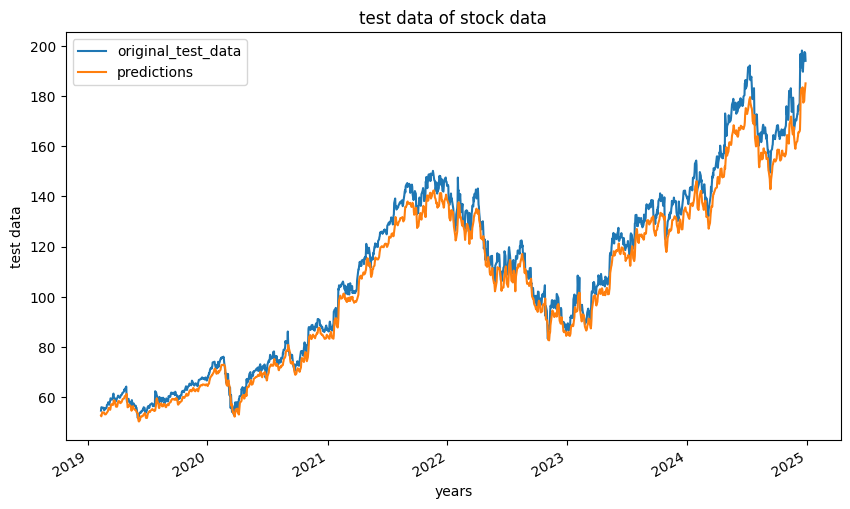

In [61]:
plot_graph((10,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

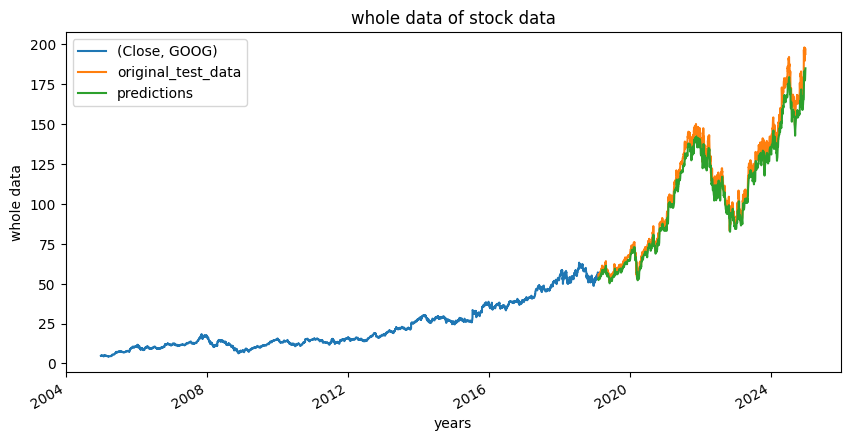

In [62]:
plot_graph((10,5), pd.concat([Close_price[:splitting_len+100], plotting_data], axis=0),'whole data')

In [63]:
model.save("Latest_stock_price_model1.keras")